Current testing:



## Testing nth word embedding decoding

In [1]:
from dataset import analysis_subject
modality = "visual"
decoding_criterion = 'only2'
start = 'onset'
level = 'sentence'
subject = '26'

scores = analysis_subject(subject, modality, start, level, decoding_criterion, runs=1)

Reading raw files for modality: visual

 Epoching for run 1, subject: 26

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-26/ses-01/meg/sub-26_ses-01_task-read_run-01_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 23000 ... 497999 =     23.000 ...   497.999 secs
Ready.
Readin

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:88: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:88: RuntimeWarning: Omitted 100 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:88: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:88: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1466 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Reading 0 ... 474999  =      0.000 ...   474.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    6.4s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 33 columns
127 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 127 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:310: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:310: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(


1 bad epochs dropped
sentence nth word embedding decoding: for 2 word


IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
%debug

> /mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/utils.py(486)generate_nth_embedding()
    484         assert df.shape[0] == 1
    485         emb_list = []
--> 486         word = df[f"{level}_words"].values[0][n_th_word]
    487         emb = nlp(word).vector
    488         emb_list.append(emb)

ipdb> df[f"{level}_words"].values[0]
array(['Elle', 'disait:'], dtype=object)
ipdb> df[f"{level}_words"].values[0][1]
'disait:'
ipdb> word = df[f"{level}_words"].values[0][n_th_word-1]
ipdb> word2 = df[f"{level}_words"].values[0][n_th_word-1]
ipdb> word2
'disait:'
ipdb> word2.strip(':')
'disait'
ipdb> word2 = word2.strip(":")
ipdb> word2
'disait'
ipdb> from scipy import spatial
ipdb> word1_vector = nlp(word1).vector
*** NameError: name 'word1' is not defined
ipdb> word2_vector = nlp(word2).vector
ipdb> word1_vector = nlp(word).vector


In [ ]:
unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=pd.DataFrame(scores))

## Spacy vector debug

In [1]:
from dataset import populate_metadata_epochs
modality = "visual"
decoding_criterion = 'embeddings_multiple_words3'
start = 'onset'
level = 'sentence'
subject = '26'
meta = populate_metadata_epochs(modality, subject, level, start, runs=1, decoding_criterion=decoding_criterion).metadata


Reading raw files for modality: visual

 Epoching for run 1, subject: 26

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-26/ses-01/meg/sub-26_ses-01_task-read_run-01_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 23000 ... 497999 =     23.000 ...   497.999 secs
Ready.
Readin

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:88: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:88: RuntimeWarning: Omitted 100 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:88: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:88: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1466 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Reading 0 ... 474999  =      0.000 ...   474.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    6.8s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 33 columns
123 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 123 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:306: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:306: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(


1 bad epochs dropped


In [15]:
import spacy
import numpy as np
nlp = spacy.load("fr_core_news_sm")
all_embeddings = []
nb_words = 1

for level_id, df in meta.groupby(["run", f"{level}_id"]):
    assert df.shape[0] == 1
    emb_list = []
    for word_i in range(nb_words):
        word = df[f"{level}_words"].values[0][word_i]
        emb = nlp(word).vector
        emb_list.append(emb)
    summed_emb = np.sum(emb_list, axis=0)
    all_embeddings.append(summed_emb)

In [17]:
summed_emb

array([ 2.9329476 ,  0.26123613, -2.3381097 , -2.178878  , -0.30753446,
       -3.946395  , -1.5632265 ,  4.9376326 ,  0.8969165 , -4.307099  ,
        4.595107  ,  3.1972883 , -0.45619524, -0.37985617, -3.5752714 ,
        4.002114  , -1.1555326 ,  0.9330391 ,  3.2721274 ,  0.22258687,
       -1.6132047 ,  5.1769924 ,  1.1438042 , -4.865309  , -0.31756994,
        1.6655339 , -2.0835528 ,  3.8185792 ,  1.015394  , -3.068824  ,
       -2.3791597 ,  0.04455459, -0.8217599 ,  3.2015903 , -3.0636935 ,
        2.0191479 ,  0.17850724,  1.675782  , -1.0336115 , -1.6803373 ,
        1.2998409 ,  1.807939  , -3.1157808 ,  0.6336121 , -1.0821135 ,
       -3.9657276 , -0.9275987 , -0.34820974,  2.2618613 ,  1.3191236 ,
       -0.29596   ,  0.28568146, -3.1505375 , -0.49888188, -6.7907724 ,
       -5.2861342 , -0.12483484, -6.5217795 , -2.2490191 , -5.7887754 ,
        0.8400024 ,  2.5190947 ,  0.8154713 ,  3.4008226 , 12.708863  ,
       -2.3363514 ,  4.9029155 ,  0.29094934, -1.0173576 ,  2.15

## Decoding next words embeddings

In [ ]:
from dataset import unique_plot, analysis_subject
modality = "visual"
decoding_criterion = 'embeddings_word_next3'
start = 'onset'
level = 'sentence'


# Analyzing data from Jz

In [ ]:
from dataset import 

No decoding data for sub-23
[Errno 2] No such file or directory: './results/visual/embeddings_word_const_non_end_word_onset_sub23.csv'
No decoding data for sub-24
[Errno 2] No such file or directory: './results/visual/embeddings_word_const_non_end_word_onset_sub24.csv'
No decoding data for sub-25
[Errno 2] No such file or directory: './results/visual/embeddings_word_const_non_end_word_onset_sub25.csv'
No decoding data for sub-26
[Errno 2] No such file or directory: './results/visual/embeddings_word_const_non_end_word_onset_sub26.csv'
No decoding data for sub-27
[Errno 2] No such file or directory: './results/visual/embeddings_word_const_non_end_word_onset_sub27.csv'
No decoding data for sub-28
[Errno 2] No such file or directory: './results/visual/embeddings_word_const_non_end_word_onset_sub28.csv'
No decoding data for sub-29
[Errno 2] No such file or directory: './results/visual/embeddings_word_const_non_end_word_onset_sub29.csv'
No decoding data for sub-30
[Errno 2] No such file or d

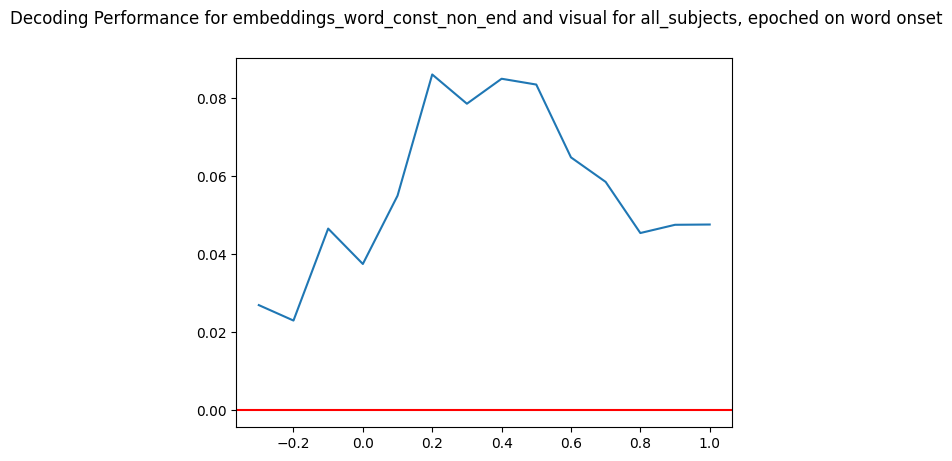

In [5]:
from dataset import sub_avg_plot
modality = "visual"
decoding_criterion = 'embeddings_word_const_non_end'
start = 'onset'
level = 'word'


sub_avg_plot(level, start, decoding_criterion, modality)


No decoding data for sub-23
[Errno 2] No such file or directory: './results/visual/embeddings_word_const_end_word_onset_sub23.csv'
No decoding data for sub-24
[Errno 2] No such file or directory: './results/visual/embeddings_word_const_end_word_onset_sub24.csv'
No decoding data for sub-25
[Errno 2] No such file or directory: './results/visual/embeddings_word_const_end_word_onset_sub25.csv'
No decoding data for sub-26
[Errno 2] No such file or directory: './results/visual/embeddings_word_const_end_word_onset_sub26.csv'
No decoding data for sub-27
[Errno 2] No such file or directory: './results/visual/embeddings_word_const_end_word_onset_sub27.csv'
No decoding data for sub-28
[Errno 2] No such file or directory: './results/visual/embeddings_word_const_end_word_onset_sub28.csv'
No decoding data for sub-29
[Errno 2] No such file or directory: './results/visual/embeddings_word_const_end_word_onset_sub29.csv'
No decoding data for sub-30
[Errno 2] No such file or directory: './results/visual/

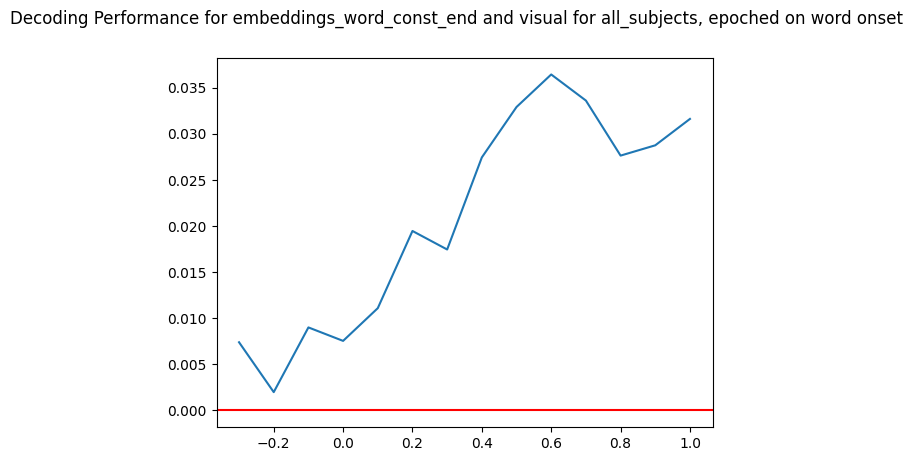

In [6]:
decoding_criterion = 'embeddings_word_const_end'
sub_avg_plot(level, start, decoding_criterion, modality)


# Testing apply_baseline

In [2]:
from dataset import populate_metadata_epochs, apply_baseline, get_path, get_subjects
modality = "visual"
path = get_path(modality)
subjects = get_subjects(path)[2:]

level = ('sentence')
start = ('onset')
decoding_criterion = 'embeddings'
runs = 1
epochs = populate_metadata_epochs(
    modality,
    subjects[0],
    level,
    start,
    runs,
    decoding_criterion
)

Reading raw files for modality: visual

 Epoching for run 1, subject: 3

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-3/ses-01/meg/sub-3_ses-01_task-read_run-01_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 36000 ... 517999 =     36.000 ...   517.999 secs
Ready.
Reading e

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:88: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:88: RuntimeWarning: Omitted 81 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:88: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, STI009, STI010, STI011, STI012, STI013, STI014, STI015, STI016, STI101, STI201, STI301 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path)


Trigger channel has a non-zero initial value of 8 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1466 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Reading 0 ... 481999  =      0.000 ...   481.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    6.8s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 33 columns
130 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 130 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:305: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:305: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(


1 bad epochs dropped


In [8]:
epochs = apply_baseline(epochs, level, tmin=-1., tmax=0)

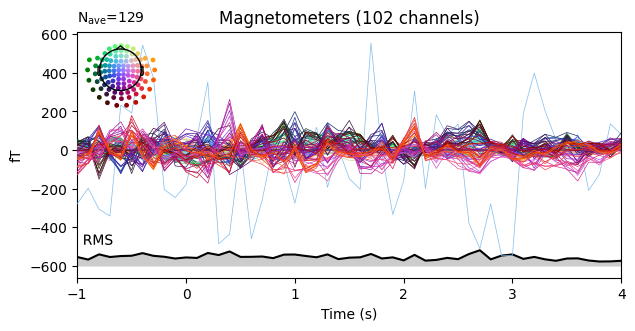

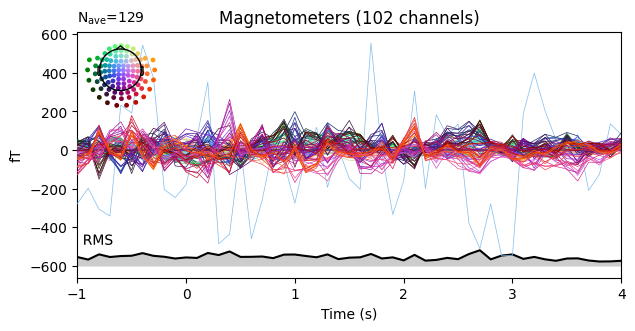

In [9]:
evk = epochs.average()
evk.plot(picks="mag", spatial_colors=True, gfp=True)

## Run 5 Sub 35 pb in visual ?

In [25]:
from dataset import populate_metadata_epochs

In [26]:
runs = 5
modality = "visual"
decoding_criterion = 'embeddings'

raw, meta = read_raw('35', runs)

Reading raw files for modality: visual

 Epoching for run 5, subject: 35



OSError: [Errno 5] Input/output error

## 4FUN Pierre bonus run decoding

# Testing

## Dataset functions


In [10]:
from dataset import get_path, get_subjects, \
    read_raw, enrich_metadata, get_code_path, populate_metadata_epochs

import mne 

mne.set_log_level(verbose='error')

### Path

In [11]:
modality = "visual"
decoding_criterion = 'embeddings'

path = get_path(modality)
subjects = get_subjects(path)

### Epoching and reading

In [5]:
subjects = get_subjects(path)
runs = 1
raw, meta = read_raw(subjects[0], runs)

Reading raw files for modality: visual

 Epoching for run 1, subject: 1



In [12]:
level = ('sentence')
start = ('onset')
decoding_criterion = 'embeddings'
runs = 1
epochs = populate_metadata_epochs(
    modality,
    subjects[0],
    level,
    start,
    runs,
    decoding_criterion
)


Reading raw files for modality: visual

 Epoching for run 1, subject: 1



## COnstutient / Setncen sizes

In [21]:
import numpy as np
leng = epochs.metadata.const_length
unique, counts = np.unique (leng, return_counts=True)
unique, counts

import matplotlib.pyplot as plt

<BarContainer object of 7 artists>

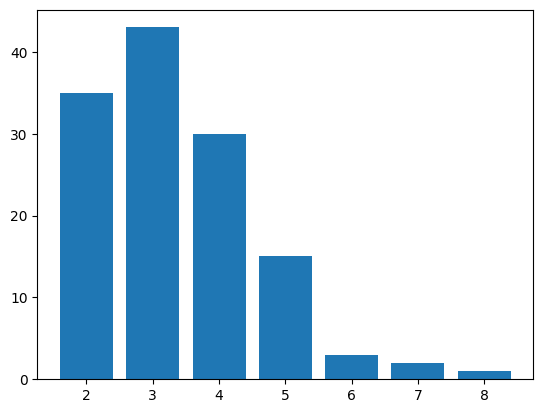

In [23]:
plt.bar(unique,counts)

<BarContainer object of 28 artists>

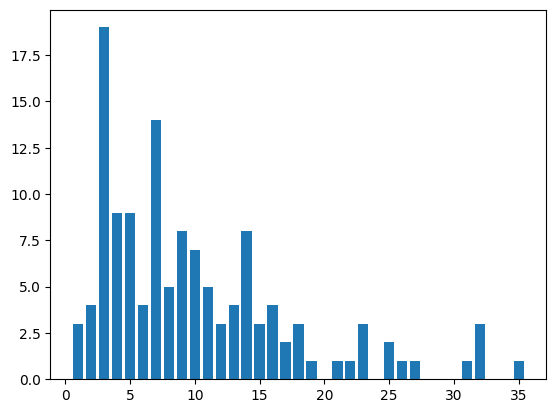

In [24]:
leng = epochs.metadata.sent_length
unique, counts = np.unique (leng, return_counts=True)
unique, counts
plt.bar(unique,counts)

### Metadata 

In [ ]:
meta_enriched = enrich_metadata(meta)


In [ ]:
meta_emb = add_embeddings(meta, runs, 'sentence')

### Analyses

In [1]:
from dataset import analysis_subject
modality = 'visual'

In [2]:
scores = analysis_subject('5', modality, 'offset', 'sentence', 'embeddings_min3', runs=2)

Reading raw files for modality: visual

 Epoching for run 1, subject: 5

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-5/ses-01/meg/sub-5_ses-01_task-read_run-01_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 89000 ... 554999 =     89.000 ...   554.999 secs
Ready.
Reading e

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:88: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:88: RuntimeWarning: Omitted 128 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:88: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:88: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1468 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Reading 0 ... 465999  =      0.000 ...   465.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    7.4s finished


Adding metadata with 33 columns
119 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 119 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:305: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(


0 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 2, subject: 5

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-5/ses-01/meg/sub-5_ses-01_task-read_run-02_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 8000 ... 514999 =      8.000 ...   514.999 s

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:88: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:88: RuntimeWarning: Omitted 134 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:88: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:88: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1605 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Reading 0 ... 506999  =      0.000 ...   506.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    7.7s finished


Adding metadata with 33 columns
128 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 128 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:305: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(


0 bad epochs dropped
Adding metadata with 33 columns
247 matching events found
No baseline correction applied
 sentence embeddings decoding


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:390: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(all_epochs)


...................................................

In [3]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [10]:
scores = analysis('5', modality, 'onset', 'sentence', 'embeddings')

TypeError: analysis() takes 2 positional arguments but 5 were given

## Utils functions

In [5]:
from utils import mne_events, decoding_from_criterion, add_syntax

In [ ]:
decoding_from_criterion('embeddings', epoch_add_metadata, starts, levels, subjects[0])

AttributeError: 'list' object has no attribute 'pick_types'

<Figure size 1280x800 with 0 Axes>

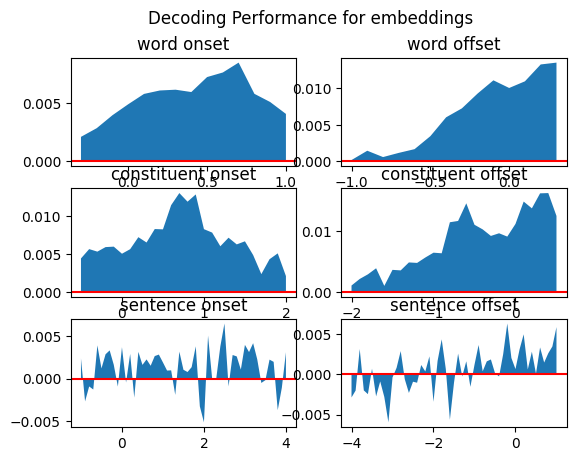

In [1]:
from dataset import plot_scores_debug
plot_scores_debug('auditory', 'embeddings')

<Figure size 1280x800 with 0 Axes>

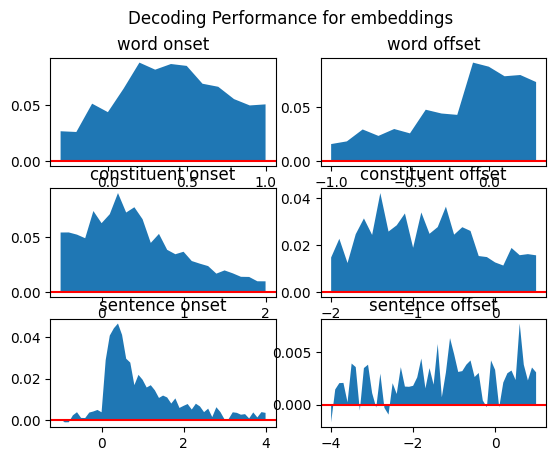

In [3]:
from dataset import plot_scores
modality = 'visual'; decoding = 'embeddings'
# load_scores('visual','embeddings')
plot_scores(modality, decoding)